<a href="https://colab.research.google.com/github/JulieWang417/DS-Unit-2-Applied-Modeling/blob/master/module3/JW_233_assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip

--2019-12-19 01:59:38--  http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.2’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.42MB/s    in 0.2s    

2019-12-19 01:59:38 (1.42 MB/s) - ‘Bike-Sharing-Dataset.zip.2’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd

# want to see all column's dtypes?
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

df = pd.read_csv('day.csv',engine='python',index_col=0)
print(df.shape)
df.head(5)

(17379, 16)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The file contains 17380 rows,16 columns:


*   instant - A unique sequential ID number for each row
*   dteday - The date of the rentals
*   season - The season in which the rentals occurred
*   yr - The year the rentals occurred
*   mnth - The month the rentals occurred
*   hr - The hour the rentals occurred
*   holiday - Whether or not the day was a holiday
*   weekday - The day of the week (as a number, 0 to 7)
*   workingday - Whether or not the day was a working day
*   weathersit - The weather (as a categorical variable)
*   temp - The temperature, on a 0-1 scale
*   atemp - The adjusted temperature
*   hum - The humidity, on a 0-1 scale
*   windspeed - The wind speed, on a 0-1 scale
*  casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
*   registered - The number of registered riders (people who had already signed up)
*   cnt - The total number of bike rentals (casual + registered)







(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

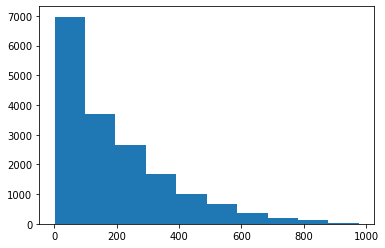

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['cnt'])

In [4]:
df['cnt'].value_counts()[:10]

5     260
6     236
4     231
3     224
2     208
7     198
8     182
1     158
10    155
11    147
Name: cnt, dtype: int64

In [5]:
df.corr()['cnt']

season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
df.hr.value_counts(normalize=True)

16    0.042005
17    0.042005
15    0.041947
13    0.041947
14    0.041947
22    0.041890
18    0.041890
19    0.041890
20    0.041890
21    0.041890
23    0.041890
12    0.041890
7     0.041832
8     0.041832
9     0.041832
10    0.041832
11    0.041832
0     0.041775
6     0.041717
1     0.041659
5     0.041257
2     0.041142
4     0.040106
3     0.040106
Name: hr, dtype: float64

the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

In [7]:
# new feature,'time_lable', 1:morning, 2:afternoon, 3:everning&night, 4:midnight
def time_lable(hour):
  if hour >=0 and hour < 6:
    return 4
  elif hour >=6 and hour < 12:
    return 1
  elif hour >=12 and hour < 18:
    return 2
  elif hour >= 18 and hour <=24:
    return 3

df['time_lable'] = df['hr'].apply(time_lable)
df['time_lable'].head()

instant
1    4
2    4
3    4
4    4
5    4
Name: time_lable, dtype: int64

In [8]:
df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [0]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [11]:
df.dteday.dt.year.value_counts()

2012    8734
2011    8645
Name: dteday, dtype: int64

# Pandas Profiling

In [12]:
!pip install --upgrade pandas-profiling
import pandas_profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [13]:
df.profile_report()

In [14]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_lable'],
      dtype='object')

In [0]:
target = 'cnt'
features = df.columns.drop([target,'casual','registered','dteday', 'atemp'])
X = df[features]
y = df[target]

In [0]:
import numpy as np
y_log = np.log1p(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [18]:
X_train.shape, X_test.shape

((14250, 12), (3129, 12))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=len(X_test), random_state=42)

In [20]:
X_train.shape, X_val.shape,X_test.shape

((11121, 12), (3129, 12), (3129, 12))

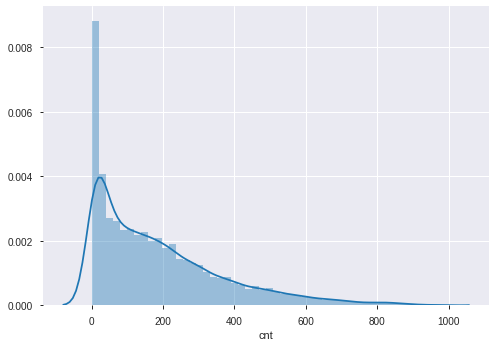

In [21]:
import seaborn as sns
sns.distplot(y);

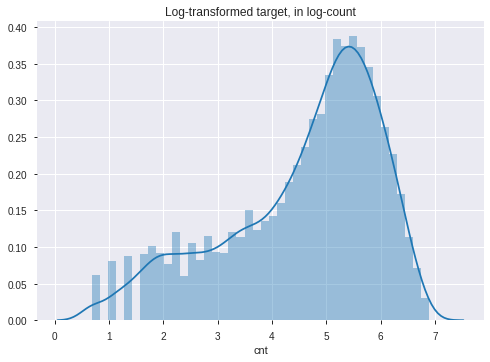

In [22]:
sns.distplot(y_log)
plt.title('Log-transformed target, in log-count');

In [23]:
!pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [0]:
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    PolynomialFeatures(degree=3),
    LinearRegression()
)
pipeline.fit(X_train,np.log1p(y_train))



Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
k=3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [68.7857096  70.08240327 70.6558687 ]


In [28]:
-scores.mean()

69.84132719129958

In [29]:
y.mean()

189.46308763450142

In [30]:
np.expm1(pipeline.predict(X_val))

array([ 60.00430952, 243.71255601,  13.81937738, ..., 315.59189269,
       322.89274775, 350.12428572])

In [31]:
from sklearn.ensemble import RandomForestRegressor

pipeline_RF = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    RandomForestRegressor(min_samples_leaf=5)
)

pipeline_RF.fit(X_train,np.log1p(y_train))

scores = cross_val_score(pipeline_RF, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [30.99929435 31.85879303 31.64200768]


In [32]:
-scores.mean()

31.500031683718785

In [33]:
np.expm1(pipeline_RF.predict(X_test))

array([423.03969967,  91.46335212,   7.81037111, ...,  32.62073032,
       374.17089001, 150.84762686])

In [34]:
y_test

instant
12831    425
8689      88
7092       4
12231    526
432       13
        ... 
7304      82
11456    307
3987      26
3785     380
6919     165
Name: cnt, Length: 3129, dtype: int64

In [35]:
scores = cross_val_score(pipeline_RF, X_test, y_test, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'Test MAE for {k} folds:', -scores)

Test MAE for 3 folds: [41.90766414 43.64918438 45.39744985]


In [36]:
-scores.mean()

43.65143279188246

I tried linear regression, ridge regression, polynormial features, random forest regressor, finally, I choose random forest regressor, since it has much lower mean_absolute_error.

But the Random Forest has many hyperparameters. We mostly used the defaults, and arbitrarily chose n_estimators. Is it too high? Too low? Just right? How do we know?

### Try RandomizedSearchCV

In [37]:
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000), 
    'targetencoder__smoothing': uniform(1, 1000), 
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, np.log1p(y_train));

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


In [38]:
print('Best hyperparameters : ', search.best_params_)
print('Cross-validation MAE : ', -search.best_score_)

Best hyperparameters :  {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.814276359914337, 'randomforestregressor__n_estimators': 288, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 206, 'targetencoder__smoothing': 184.60557328726867}
Cross-validation MAE :  0.22163636940855758


In [0]:
pipeline = search.best_estimator_

### Make predictions for test set

In [0]:
# use np.log1p() rather than np.log() to target
# reverse prediction with np.exp() or np.expm1()

In [41]:
from sklearn.metrics import mean_absolute_error

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, np.expm1(y_pred))
print(f'Test MAE: {mae:,.0f}')

Test MAE: 25


https://people.duke.edu/~rnau/rsquared.htm   
the r^2 score here is adjusted

In [42]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test, np.expm1(y_pred))
print(f'Test R_Square: {R_square:,.0f}')

Test R_Square: 1


In [43]:
pd.DataFrame([y_test.to_list(), np.expm1(y_pred)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128
0,425.000000,88.000000,4.000000,526.000000,13.000000,32.000000,706.000000,26.000000,2.000000,21.000000,34.000000,89.000000,542.000000,9.000000,325.000000,336.000000,188.00000,479.000000,16.000000,852.000000,8.000000,161.000000,37.000000,84.000000,124.000000,144.000000,23.00000,188.000000,6.000000,82.000000,3.000000,29.000000,374.000000,76.000000,76.000000,868.000000,8.000000,122.000000,109.000000,315.000000,614.000000,142.000000,201.000000,3.000000,649.000000,243.000000,158.000000,195.000000,30.00000,118.000000,...,20.000000,432.000000,148.000000,1.000000,160.000000,531.000000,72.000000,198.000000,115.000000,7.000000,214.000000,19.00000,18.000000,584.000000,86.000000,207.000000,40.000000,92.000000,135.000000,10.000000,13.000000,101.000000,5.000000,97.000000,28.000000,539.00000,14.000000,315.000000,567.00000,11.000000,23.000000,1.000000,500.000000,73.000000,335.000000,125.00000,810.000000,66.00000,8.000000,299.000000,64.000000,53.000000,141.000000,102.000000,356.000000,82.000000,307.000000,26.000000,380.000000,165.000000
1,366.950179,98.235985,9.566431,517.076193,13.106733,35.166042,754.509963,27.120766,9.138303,24.121974,12.829636,109.654796,597.669836,6.580277,321.959551,174.294006,153.77957,369.011271,21.966944,787.131842,8.495783,151.771231,40.434859,118.743834,126.244557,134.944872,12.73078,158.652872,3.339262,78.676252,3.186054,23.627822,332.212139,45.713645,66.016488,788.855081,4.839733,228.734005,219.237796,334.095392,546.961736,135.740345,201.130597,2.850059,712.484616,262.849174,155.378829,109.615755,20.39476,111.355391,...,34.928943,426.542432,129.087915,1.999497,182.450912,552.251373,51.584658,231.405933,144.623692,3.612548,279.667172,39.53689,17.293623,450.632469,108.826028,139.224129,52.300947,104.545327,73.873782,6.482121,13.701406,65.918578,4.525757,112.766025,22.812549,462.01393,15.746971,316.451578,489.55261,7.791278,78.293022,2.151207,418.323496,81.624102,262.639355,121.04369,831.587286,62.56077,9.434717,304.561601,56.070842,69.499351,76.182285,67.805767,374.018522,84.377617,396.140123,31.235812,378.781958,142.421344


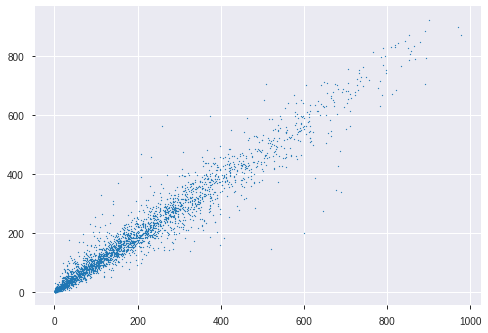

In [44]:
plt.scatter(y_test, np.expm1(y_pred), s=1);

### With eli5 library

In [0]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

In [46]:
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [47]:
!pip install eli5

In [48]:
import eli5
from eli5.sklearn import PermutationImportance

# 1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='neg_mean_absolute_error', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1,
                                                      oob_score=False,
   

In [49]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

holiday         0.274165
windspeed       0.642601
weathersit      3.341265
weekday         4.513069
time_lable      5.454601
mnth            5.979314
hum             6.799200
season          7.947433
yr             30.191359
temp           31.178098
workingday     35.578933
hr            126.141618
dtype: float64

In [50]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
126.1416 ± 2.7622,hr
35.5789 ± 1.7225,workingday
31.1781 ± 0.6915,temp
30.1914 ± 0.9832,yr
7.9474 ± 0.6831,season
6.7992 ± 0.5931,hum
5.9793 ± 0.3123,mnth
5.4546 ± 0.2515,time_lable
4.5131 ± 0.3567,weekday
3.3413 ± 0.3724,weathersit


I can remove features with zero or less than zero importance, for this model, every imortance is above zero, so I choose do nothing with it.

### Use xgboost for gradient boosting

In [51]:
# XGBoost

from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, np.log1p(y_train))

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
       

In [52]:
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, np.expm1(y_pred))
print(f'VAL MAE: {mae:,.0f}')

VAL MAE: 70


In [53]:
# XGBoost + Cross_Validation

k=3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [81.94082546 76.91301984 68.92339181]


In [54]:
-scores.mean()

75.92574570506137